### Papers

- [DeepCoder](https://arxiv.org/pdf/1611.01989.pdf)
- [List of papers by Gabriel preda](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130794)
- [WReN](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130364)

### Notebooks 

- [Starter Notebook](https://www.kaggle.com/inversion/abstraction-and-reasoning-starter-notebook)
- [Visualize pairs with gridlines](https://www.kaggle.com/boliu0/visualizing-all-task-pairs-with-gridlines)
- [Manual Coding for the First 10](https://www.kaggle.com/nagiss/manual-coding-for-the-first-10-tasks)
- [View all data](https://www.kaggle.com/nagiss/abstraction-and-reasoning-view-all-data)
- [Check the purpose](https://www.kaggle.com/t88take/check-the-purpose)
- [EDA + PyTorch CNN](https://www.kaggle.com/tarunpaparaju/arc-competition-eda-pytorch-cnn): I didn't like so much...
- [DSL and Genetic Algorithm applied to ARC](https://www.kaggle.com/zenol42/dsl-and-genetic-algorithm-applied-to-arc): this may be good.
- [A Naive Image Manipulation DSL](https://www.kaggle.com/nanoix9/a-naive-image-manipulation-dsl)

### Discussions

- [DeepMind's papers in abstract and relational reasoning](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/131741)
- [Recursion](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130778#747811), with linked [paper](https://openreview.net/pdf?id=Skp1ESxRZ).


### Ideas

My ideas

- Summarize each sample in a given task in some other medium (similar to the program translation)?
  - Inspired by [this paper](https://papers.nips.cc/paper/7845-learning-to-infer-graphics-programs-from-hand-drawn-images.pdf). And main author's [site](http://www.mit.edu/~ellisk/).
- Genetic Programming for Program Synthesis.
  - How the concepts of *gene*, *chromosome*, *genotype*, *phenotype* etc. applies to the ARC data?
- Explore task with "same" pattern using the colab dataset about them that I have downloaded. Build on that; for 30 tasks in that category, try solving 10 and try generelize to the remaining.
- Explore natural computing paradigms, specifically artificial immune systems algorithms. Maybe combine with genetic programming?
- [Estimation of distribution algorithms](https://www.wikiwand.com/en/Estimation_of_distribution_algorithm) may be interesting with program syntheis in the search phase?
  - *... are stochastic optimization methods that guide the search for the optimum by building and sampling explicit probabilistic models of promising candidate solutions.*
  - It seems that it isn't only me who thinks [that](https://slideplayer.com/slide/10859008/).
- Learning from past mistakes. Iterate over examples. Compression. What more?!
  - Conflict-driven learning.
- Program synthesis where the user intent is expressed in traces that could be learned, and then use the learned traces in new tasks?!
- Program synthesis by examples.
  - How to generalize programe examples from solutions to some tasks sharing some patterns?
- Neural program synth, like https://arxiv.org/pdf/1703.07469.pdf and DeepCoder. How to predict which funtions to use given the task at hand? Each task more than one sample and share some regularities between its samples, like croping a specfic object. How can this be used?
  - Continously searching for functions given the task at hand and the intermediate parts after applying these functinos in the output; converges when input == output. RL approach?
- Embeddings? Embbed programs + in-out samples?
- PushGP

Chollet advices

- [1](https://twitter.com/fchollet/status/1228056479854317568/photo/1), [kaggle](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130360#745388): Take a few tasks, write by hand programs that solve them, and think...
  - *Could they [the programs] be expressed more naturally in a different medium* (a Domain Specific Language; remember HTML is a DSL, as well as CSS, SQL etc.)?
    - For example, some tasks require "filling" pixels, other require "moving" objects etc.
    - It can be useful to describe the data properties such as *number of pixels*, because some tasks not only changes its pixels but increase its number.
    - AST representation could be a useful/natural expression?!
  - *What would a search process that outputs such programs look like?*
    - There are some [options](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/12/ppdp10-synthesis.pdf): brute-froce, version space, ml-based (probabilistic inference, genetic programming, logical reasoning).
  - *How could you simplify this search by conditioning it on the task data?*
    - Program synthesis can help here.
    - For example, in the task of **filling pixels**, a question can be like "based on this data, which program can perform this action?".j
      - Can be a search, can be synthesis, can be both?
        - The **synthesis** could be in the *domain specific language* used. See task, see data, know actions, generates DSL code, perform actions?
  - *Once you have a set of generated candidates for a solution program, how do you pick the one most likely to generalize?*
    - Continuing from the example above: "which program better generalizes?"
      - This is a difficult one, I think. I need to know more. How to measure proficiency at the desired task?
        - I will need to evaluate my reasoning in solving the task, and see what non-solved task looks like.
  - *If you want to use external data, or hard-code Core Knowledge priors -- all of this is allowed. Virtually anything is allowed. Just get those leaderboard scores to go down :)*
- [2](https://www.youtube.com/watch?v=2L2u303FAs8&list=PLht6tyws1YpSOGz2k6bUC1PibVG7ZiRFB&index=6&t=0s): blending symbolic AI & geometric AI.
  - How would that work here?
- [3](https://www.wikiwand.com/en/Program_synthesis): program synthesis.
  - Could help with 1.
- [4](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130710#764733): *the test tasks only leverage Core Knowledge priors and nothing else.*
- [5](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130345#745382): *The goal is develop an AI that will be capable of autonomously making sense of tasks it has never been directly programmed or trained to handle.*
- [6](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130527#746338): *You can hard-code rules & knowledge, and you can use external data.*
- [7](https://www.youtube.com/watch?v=U8ekfLYBGR0): his notes.

Other advices

- Jeremy P Howard gives [Genetic Programming](https://www.wikiwand.com/en/Genetic_programming), which may be used in the approach above, as suggested by FC.
  - "It is essentially a heuristic search technique often described as 'hill climbing', i.e. searching for an optimal or at least suitable program among the space of all programs."
    - This may be an answer to the "search process".
- Davide Bonin says: *The real challenge is writing each solution as a composition of (reasonably few) task-independent functions.*
- [Pathan](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130345#748512): cites [Moravec paradox](https://www.wikiwand.com/en/Moravec%27s_paradox).
- [jack liu](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130527#748780): deep concept.

### What to do

Synthesizer dimensions:
1. User intent: the kind of constraints that it accepts as expression of user intent.
   - For exemple, input/output examples.
   - A DSL encodes prior knowledge.
2. Search space: the space of programs over which it searches.
  - *The search space can be over imperative or functional programs (with possible restrictions on the control structure or the operator set), or over restricted models of computations such as regular/context-free grammars/transducers, or succinct logical representations.*
3. Search technique: the search technique it employs.
  - Machine learning techniques, for example: belief propagation or genetic programming.
  - Reduce the search space by the use of abstractions.

- Priors scope: *background knowledge...?*
    - Solve some questions:
      - I'm doing this in [here](solving.ipyng) for the tasks with primarily `crop` pattern.
- Program synthesis scope: *discovering programs that realize user intent.*
    - Create a DSL to express the programs (the user intent? the constraints of the space of programs?).
      - Input/output examples are a form of constraint. What are others complementary forms?
    - Create the search framework
      - Genetic framework?
      - Bayeasian framework?


Discussion

- Each program has its specification based on a predetermined DSL.
- *By specifying only the data type requirements for a problem, we can limit the number of instructions without cherry picking*. [[Fonte](http://cs.hamilton.edu/~thelmuth/Pubs/2015-GECCO-benchmark-suite.pdf)]
- Semantic space vs syntax space and the natural iterative coding process.
  - Bridging the gap between the syntax and semantics of a program. [[Source](https://arxiv.org/pdf/1906.04604.pdf)]
- Jointly learning and searching.
- Assess the execution state.
- Recursion is the key to achieve generalizability. [[Source](https://openreview.net/pdf?id=Skp1ESxRZ)]
  - Recursion divides the problem into smaller pieces and drastically reduces the domain of each neural network component, making it tractable to prove guarantees about the overall system’s behavior. https://arxiv.org/pdf/1704.06611.pdf
- A central idea in unsupervised learning is compression: finding data representations that require the fewest bits to write down. https://papers.nips.cc/paper/5785-unsupervised-learning-by-program-synthesis.pdf
- One aspect that makes abstract reasoning substantially difficult is the presence of distracting features in addition to the reasoning features that are necessary to solve the problem. Learning algorithms would have to leverage various counter-evidence to reject any false hypothesis before reaching the correct one. [1912.00569]
  - Curriculum learning as way to help with that.
  - Learn the curriculum? To automate.

# Load libraries and import some utility functions

In [1]:
import os
import json
from pathlib import Path

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

for dirname, _, filenames in os.walk('arc'):
    print(dirname)

arc
arc/evaluation
arc/test
arc/training


In [11]:
from data import training_path
from data import training_tasks, evaluation_tasks, test_tasks
from plot_utils import cmap, norm
from plot_utils import load_and_plot, plot_one_ax
from plot_utils import plot_task, plot_pred_and_target, plot_task_and_pred, just_plot
from plot_utils import nth_sample

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
print(len(training_tasks), len(evaluation_tasks), len(test_tasks))

400 400 100


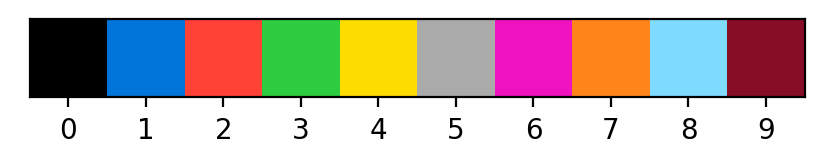

In [5]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

- Tasks have multiple `train` input-output pairs.
- Most tasks have a single `test` input-output pairs, although some have more than one.

# DSL starter

- Inspired by [Jérémy Cochoy](https://www.kaggle.com/zenol42/dsl-and-genetic-algorithm-applied-to-arc)

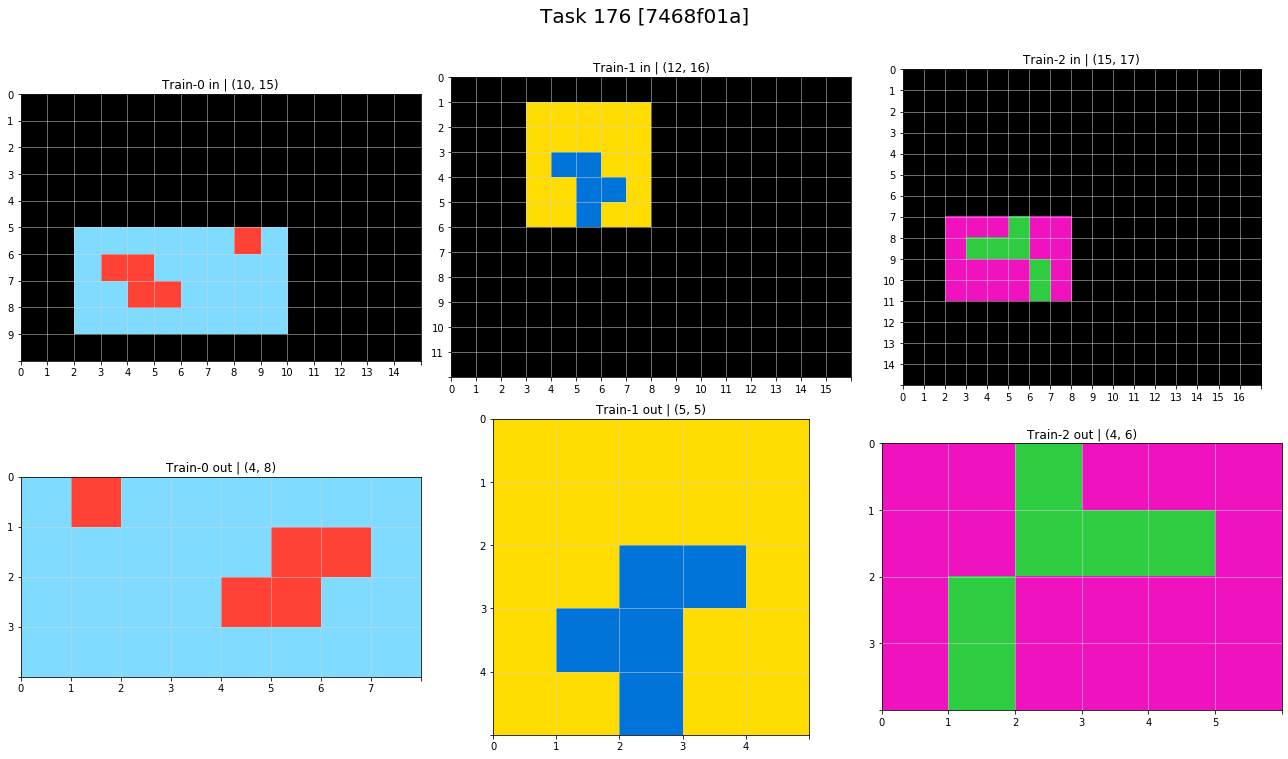

In [9]:
fname = '7468f01a.json'
tid = training_tasks.index(fname)
task_dict = load_and_plot(training_path, training_tasks[tid], return_what=2, task_id=tid, only_train=True)

In [19]:
from dsl import crop_to_content, reflect_image
from evaluation import evaluate, program_description

In [12]:
task = task_dict['test']
sample_id = 0
pixmap_in, pixmap_out = nth_sample(task, sample_id)

In [20]:
program = [crop_to_content, reflect_image]
program_description(program)

'crop_to_content >> reflect_image'

In [27]:
results = evaluate(program=program, input_image=pixmap_in)

04/02/2020 01:26:49 PM:INFO: Applying crop_to_content...
04/02/2020 01:26:49 PM:INFO: Applying reflect_image...


In [28]:
results

[array([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 8, 8, 8, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [8, 8, 8, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 8, 8, 1],
        [1, 1, 1, 1, 8, 1, 1, 1]])]

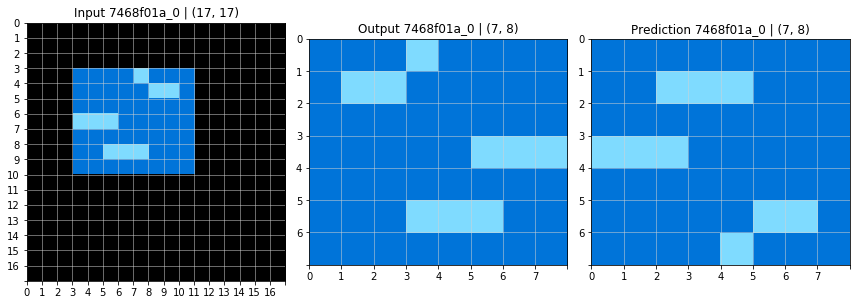

In [31]:
for img in results:
    plot_task_and_pred(task, img, fname, sample_id)